<h1 align="center"> 
Military Spending Analysis
</h1>

<h4 align="center"> 
Tina Nguyen 
</h4>

## 1. Import data and preprocessing

In [1]:
#import packages
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
#loop through all files in the folder and drop unnecessary columns, change columns name, select 10 countries in each files
#put them in an empty list and concatenate them
countries = ['China', 'Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Iran, Islamic Rep.', 'Saudi Arabia', 'Israel', 'Korea, Rep.']

path =r'C:\Users\tinan\Desktop\Data Mining\DATS 6103 - Individual Project 1 - Tina Nguyen' # use your path
allF = glob.glob(path + "/*.csv")
listcountries = []
for file in allF:
    df = pd.read_csv(file,index_col=None, header=0, skiprows=5)
    df.drop(df.columns[3:-9], axis=1, inplace=True) #drop all the unnecessary columns year
    df.drop(df.columns[-1], axis=1, inplace=True)
    df.columns = ['Country Name', 'Country Code', 'Indicator Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] #rename columns
    #select the 10 countries for comparision
    df = df.loc[df['Country Name'].isin(countries)]
    listcountries.append(df) #create a list with all the dataframes
df = pd.concat(listcountries).reset_index(drop=True) #concatenate all dataframes in list
df = df.drop(columns=(['Country Code']))

df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
0,China,Military expenditure (current USD),1.157118e+11,1.379673e+11,1.573904e+11,1.798805e+11,2.007722e+11,2.140931e+11,2.160313e+11,2.282307e+11
1,Germany,Military expenditure (current USD),4.625552e+10,4.814035e+10,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.432928e+10
2,France,Military expenditure (current USD),6.178175e+10,6.460093e+10,6.003515e+10,6.241710e+10,6.361357e+10,5.534213e+10,5.735841e+10,5.777012e+10
3,United Kingdom,Military expenditure (current USD),5.808285e+10,6.027044e+10,5.849566e+10,5.686176e+10,5.918286e+10,5.386219e+10,4.811894e+10,4.719310e+10
4,"Iran, Islamic Rep.",Military expenditure (current USD),1.356127e+10,1.427767e+10,1.649396e+10,1.199719e+10,9.901105e+09,1.058877e+10,1.226396e+10,1.454805e+10


In [5]:
#find military spending per capita by dividing military expenditure for population

#create subsets for military expenditure and population
militaryex = df.loc[(df['Indicator Name'] == 'Military expenditure (current USD)')]
population = df.loc[(df['Indicator Name'] == 'Population, total')] 

#divide expenditure dataframe for population dataframe
#only perform the calculation on the year columns, 2nd column to 9th
ms = militaryex.iloc[:,2:].values/population.iloc[:,2:].values

#create a new dataframe for military spending per capita using data from ms and column names from df dataframe
#this dataframe only contains the year columns, does not have Country Name and Indicator Name 
df1 = pd.DataFrame(ms, columns=df.columns[2:])

#slice the first ten rows (represent 10 countries) and two columns of df dataframe to get the data for the first 2 columns
subset = df.iloc[:10,:2]

#combine the two dataframes together. The year columns are matched with the country name column
subset1 = pd.concat([subset,df1], axis=1)
#change the Indicator Name from GDP (current US$) to Military Speding per capita
subset1['Indicator Name'] = subset1['Indicator Name'].replace('Military expenditure (current USD)', 'Military spending per capita')

#concatenate the military spending per capita dataframe to the original data frame
df = pd.concat([df, subset1], axis=0, ignore_index=True)

df.tail()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
45,Israel,Military spending per capita,1911.588787,2101.331750,1965.195505,2146.811047,2249.486775,2024.227709,1729.790015,1892.593293
46,Italy,Military spending per capita,607.858630,642.141214,566.558856,562.671302,519.376382,416.505644,465.231879,482.835847
47,"Korea, Rep.",Military spending per capita,568.574031,620.620634,636.491123,676.926216,739.996079,716.863811,720.732539,760.742042
48,Russian Federation,Military spending per capita,411.063732,491.305942,568.913732,615.669976,588.907672,460.930957,479.729528,459.081406
49,Saudi Arabia,Military spending per capita,1649.714426,1718.637969,1942.418113,2238.142354,2624.139114,2762.793321,1972.779077,2107.380061


In [7]:
#rearrange the df dataframe
#group the data by Country Name and Indicator Name
df = pd.melt(df, id_vars=['Country Name','Indicator Name'], var_name='year', value_name='value') 
df = df.set_index(['Country Name','Indicator Name','year']).sort_index()

df.tail()

value
Country Name   Indicator Name    year            
United Kingdom Population, total 2013  64128226.0
                                 2014  64613160.0
                                 2015  65128861.0
                                 2016  65595565.0
                                 2017  66022273.0

## 2. Compare military spending to that country's GDP

In [8]:
indicator = ['GDP (current US$)','Military expenditure (current USD)'] #specify the indicator for comparison 
new = df.copy() #create a new dataframe by copying the orginial dataframe
new['value'] = (new['value']/1000000000).round(2) #set data in billion

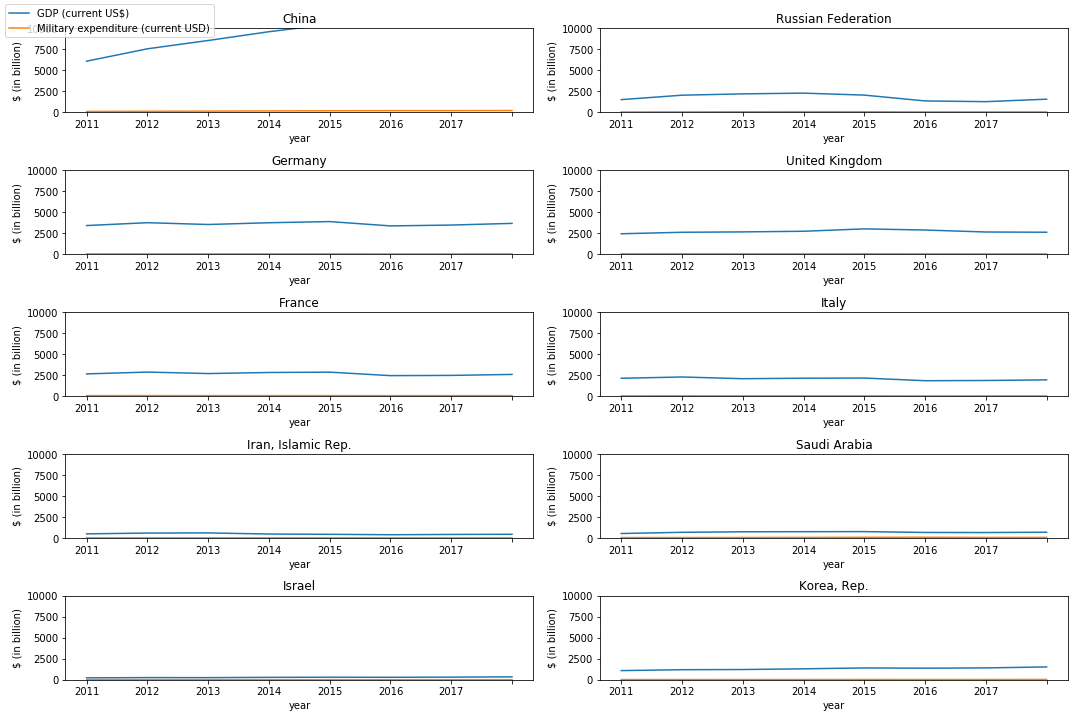

In [9]:
#plot the data for GDP and Military expenditure
#loop through every country to plot the two indicators
fig=plt.figure(figsize=(15,10))

for country, num in zip(countries,range(1,len(countries)+1)):
    newer = new.loc[country].loc[indicator].unstack(level=0) #create a dataframe called newer for each country and indicators
    ax = fig.add_subplot(5,2,num)
    pp = newer['value'].plot(y=indicator,title=country, ax=ax) #plot newer
    ax.set_xticklabels(newer.index) #set labels for xtick
    ax.set_ylabel('$ (in billion)')
    ax.legend_.remove()
    ax.set_ylim(0,10000) #set all plot to the same scale
fig.legend(indicator, loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
#military spending as percentage of gdp
df2 = df.reset_index()

#create dataframe for total gdp of each country by grouping the data by country and sum it
gdp = df2.loc[(df2['Indicator Name'] == 'GDP (current US$)')].groupby('Country Name').sum()
#create a dataframe for total military spending by grouping the data by country and sum it
ms = df2.loc[(df2['Indicator Name'] == 'Military expenditure (current USD)')].groupby('Country Name').sum()
#find military spending as a percentage of gdp
pct = (ms/(gdp+ms)*100).round(2).sort_values(by='value')
pct

,value
Country Name,
Germany,1.23
Italy,1.54
China,1.85
United Kingdom,2.00
France,2.21
"Korea, Rep.",2.54
"Iran, Islamic Rep.",2.64
Russian Federation,3.91
Israel,5.32


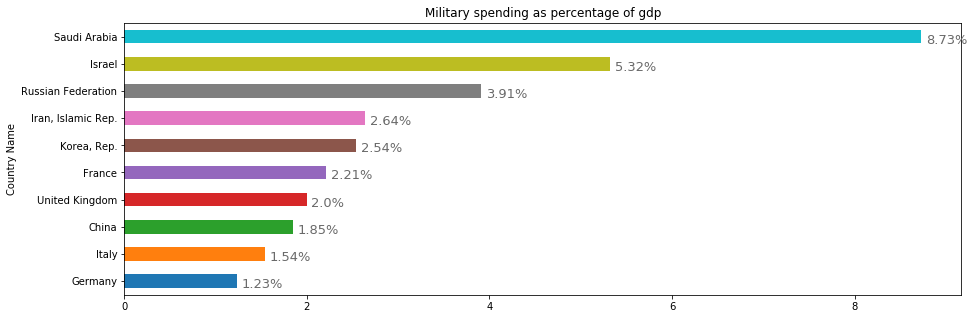

In [11]:
#plot a horizontal bar plot
f, ax = plt.subplots(figsize=(15,5))
pd.Series(pct['value']).plot(kind='barh', title='Military spending as percentage of gdp')
#label the percentage at the top of each bar
for i, v in enumerate(pct['value']):
    ax.text(v +0.05 , i - 0.25 , str(v)+'%', color='dimgrey',fontsize=13)
plt.show()

## 3. Compare total spending from 2010 to 2017

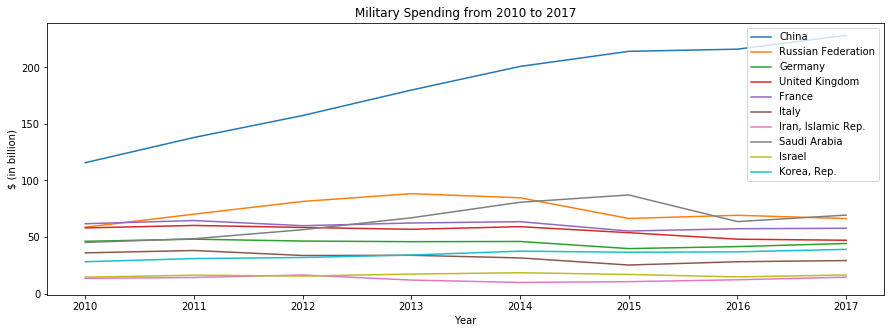

In [12]:
#plot the military spending of each country by year
#loop through each country then slice the observation for Military expenditure then plot it
fig,ax = plt.subplots(figsize=(15,5))

for country in countries:
    new1 = new.loc[country].loc[['Military expenditure (current USD)']].unstack(level=0)
    ax.plot(new1.index, new1.values)
ax.legend(countries)
ax.set_ylabel('$ (in billion)')
ax.set_xlabel('Year')
ax.set_title('Military Spending from 2010 to 2017')
plt.show()

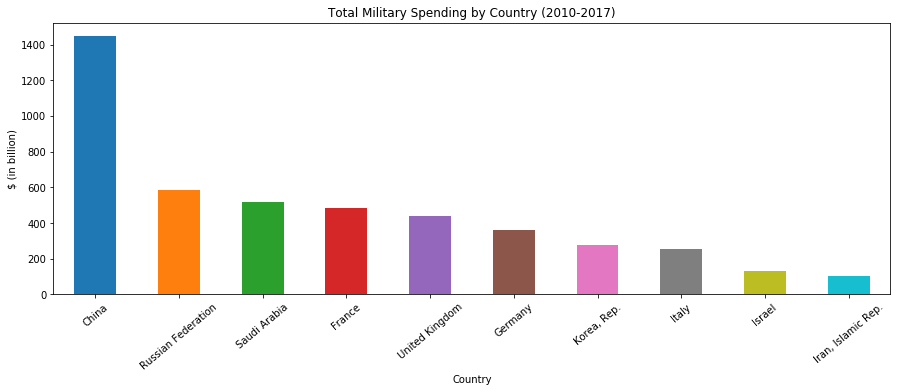

In [13]:
#plot the total military spending from 2010 to 2017 of each country
idx = pd.IndexSlice
f, ax = plt.subplots(figsize=(15,5))
#slice military spending for each country over 7 years and add them
totalmil = new.loc[idx[:, 'Military expenditure (current USD)', :], :].unstack(level=0).sum().sort_values(ascending=False) 

#create a list of countries for xtick label
label = []
for i in range(0, len(totalmil.index)):
    c = (totalmil.index[i][1])
    label.append(c)
    
totalmil.plot(kind='bar', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('$ (in billion)')
ax.set_title('Total Military Spending by Country (2010-2017)')
ax.set_xticklabels(label, rotation = 40)
plt.show()

## 4. Compare military spending per capita to GDP per capita

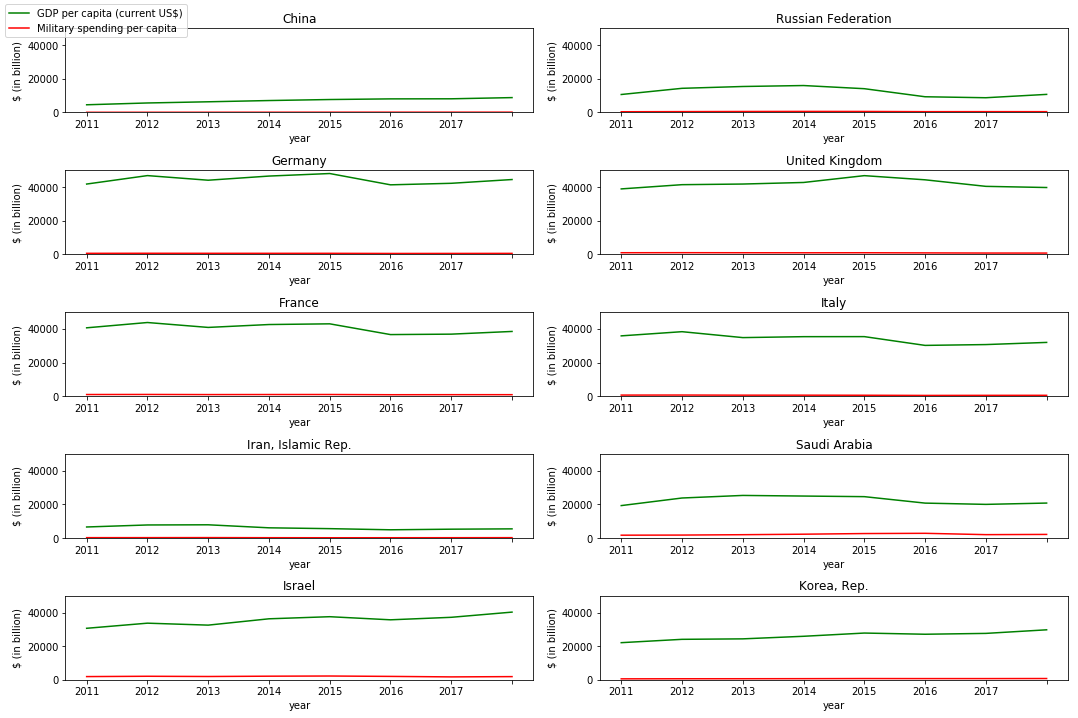

In [14]:
#plot the GDP percapita vs military spending percapita of each country
indicator2 = ['GDP per capita (current US$)','Military spending per capita'] #list of indicators we want to compare

fig=plt.figure(figsize=(15,10))
#loop through each country and 2 chosen indicators in indicator2   
for country, num in zip(countries,range(1,len(countries)+1)):
    newer = df.loc[country].loc[indicator2].unstack(level=0) 
    ax = fig.add_subplot(5,2,num) #set the plots in 5 rows and 2 columns
    pp = newer['value'].plot(y=indicator2,title=country, ax=ax, color=['green','red'])
    ax.set_xticklabels(newer.index) #set xtick
    ax.set_ylabel('$ (in billion)') #set y axis label
    ax.legend_.remove()
    ax.set_ylim(0,50000) #set the same scale for the y axis for all countries 
fig.legend(indicator2, loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
#rearrange df dataframe
df3 = df.reset_index()
df3.head()

,Country Name,Indicator Name,year,value
0,China,GDP (current US$),2010,6.100620e+12
1,China,GDP (current US$),2011,7.572554e+12
2,China,GDP (current US$),2012,8.560547e+12
3,China,GDP (current US$),2013,9.607224e+12
4,China,GDP (current US$),2014,1.048237e+13


In [16]:
#military spending per capita as percentage of gdp per capita
#total military pcp / total gdp pcp - graph by year for each country

#find gdp per capita for each country, by year
gpcp = df3.loc[(df3['Indicator Name'] == 'GDP per capita (current US$)')]
gpcp = gpcp.set_index(['Country Name','year']).drop(columns = (['Indicator Name']))
#find military per capita for each country, by year
mpcp = df3.loc[(df3['Indicator Name'] == 'Military spending per capita')]
mpcp = mpcp.set_index(['Country Name','year']).drop(columns = (['Indicator Name']))
#military spending as a percentage of gdp per capita
percentage = (mpcp/(gpcp+mpcp)*100).round(2)
percentage.head()

value
Country Name year       
China        2010   1.86
             2011   1.79
             2012   1.81
             2013   1.84
             2014   1.88

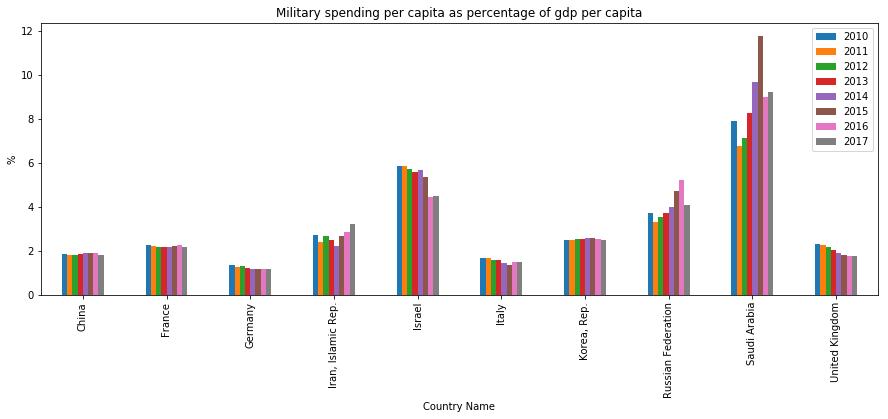

In [17]:
#plot
#how the percentage changed over the years for each country
year = ['2010','2011','2012','2013','2014','2015','2016','2017']
ax = percentage.unstack(level=1).plot(kind='bar', figsize=(15,5))
ax.set_title('Military spending per capita as percentage of gdp per capita')
ax.set_ylabel('%')
ax.legend_.remove()
ax.legend(labels=year)
plt.show()

## 5. Single out the fastest growing countries in military spending in fixed value and in percentage

In [18]:
#fastest growing countries in mil spending in fixed value
mil = pd.melt(militaryex, id_vars=['Country Name','Indicator Name'], var_name='year', value_name='value')

#get the military spending of each country in 2010
minM = mil.loc[mil['year'] == min(mil['year']), ['Country Name','value']] 
#get the military spending of each country in 2017
maxM = mil.loc[mil['year'] == max(mil['year']), 'value'].reset_index(drop=True)
#concatenate the 2 dataframes 
new_df = pd.concat([minM,maxM],axis=1)
#rename columns
new_df.columns.values[1], new_df.columns.values[2] = min(mil['year']), max(mil['year'])
#create a column called delta for change in military spending between 2010 and 2017
new_df['delta'] = new_df.iloc[:,2] - new_df.iloc[:,1]
new_df.iloc[:,1:] = (new_df.iloc[:,1:]/1000000000).round(2) #set data in billion
new_df

,Country Name,2010,2017,delta
0,China,115.71,228.23,112.52
1,Germany,46.26,44.33,-1.93
2,France,61.78,57.77,-4.01
3,United Kingdom,58.08,47.19,-10.89
4,"Iran, Islamic Rep.",13.56,14.55,0.99
5,Israel,14.57,16.49,1.92
6,Italy,36.03,29.24,-6.80
7,"Korea, Rep.",28.18,39.15,10.98
8,Russian Federation,58.72,66.33,7.61
9,Saudi Arabia,45.24,69.41,24.17


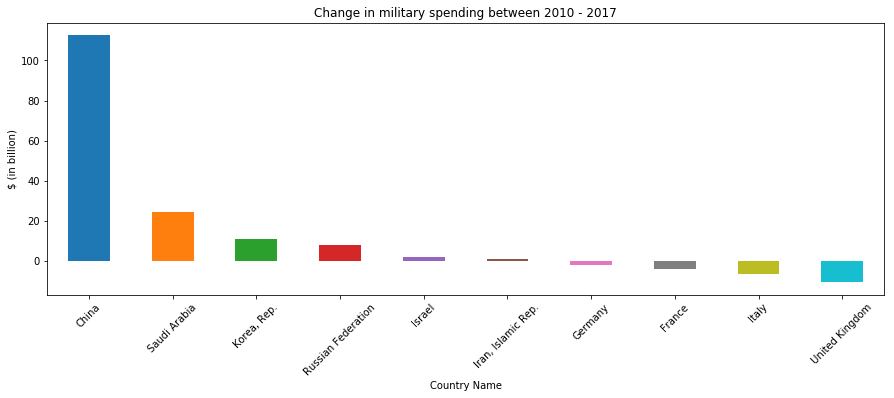

In [19]:
#plot the change in military spending between 2010 and 2017
f, ax = plt.subplots(figsize=(15,5))
new_df.sort_values(by=['delta'],ascending=False).plot(x='Country Name', y='delta', kind='bar', ax=ax)
plt.xticks(rotation=45)
ax.set_ylabel('$ (in billion)')
ax.legend_.remove()
ax.set_title('Change in military spending between 2010 - 2017')
plt.show()

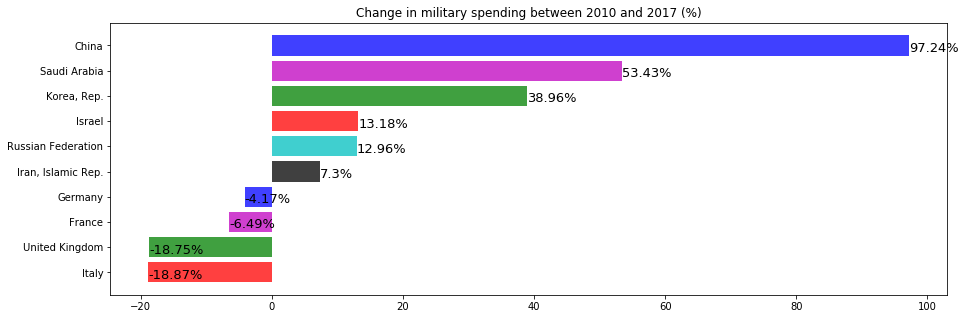

In [20]:
#fastest growing countries in mil spending in percentage
new_df['percent'] = (new_df['delta'] / abs(new_df['2010'])  * 100).round(2)
new_df = new_df.sort_values(by=['percent'])

#plot a horizontal bar plot for comparison
f, ax = plt.subplots(figsize=(15,5))
ax.barh(new_df['Country Name'],new_df['percent'],color='rgmbkc', alpha=0.75)
#label the percentage at the top of each bar
for i, v in enumerate(new_df['percent']):
    ax.text(v , i - 0.25 , str(v)+'%', color='black',fontsize=13)
ax.set_title('Change in military spending between 2010 and 2017 (%)')
plt.show()